In [2]:
#%matplotlib widget
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
import pandas as pd
import re


vars = {"vas" : "northward near-surface wind (m.s-1)",
"uas":"eastward near-surface wind (m.s-1)",
"tas":"2-meter air temperature (degC)",
"pr": "total precipitation amount (mm)",
"rsds" : "surface downwelling shortwave radiation (W.m-2)",
"rlds" : "surface downwelling longwave radiation (W.m-2)",
"hurs" : "2-meter relative humidity (%)"    
}

2285

'[1] "uas"'

34275

'[1] "vas"'

34275

'[1] "ps"'

34275

'[1] "tas"'

34275

'[1] "pr"'

34275

'[1] "rsds"'

34275

'[1] "rlds"'

34275

'[1] "hurs"'

34275

'[1] "cc"'

34275

uas       0.921601
vas       0.013652
ps      991.977264
tas      -3.214874
pr        2.067665
rsds     22.658980
rlds    255.114350
hurs     82.682951
cc        0.021864
dtype: float64

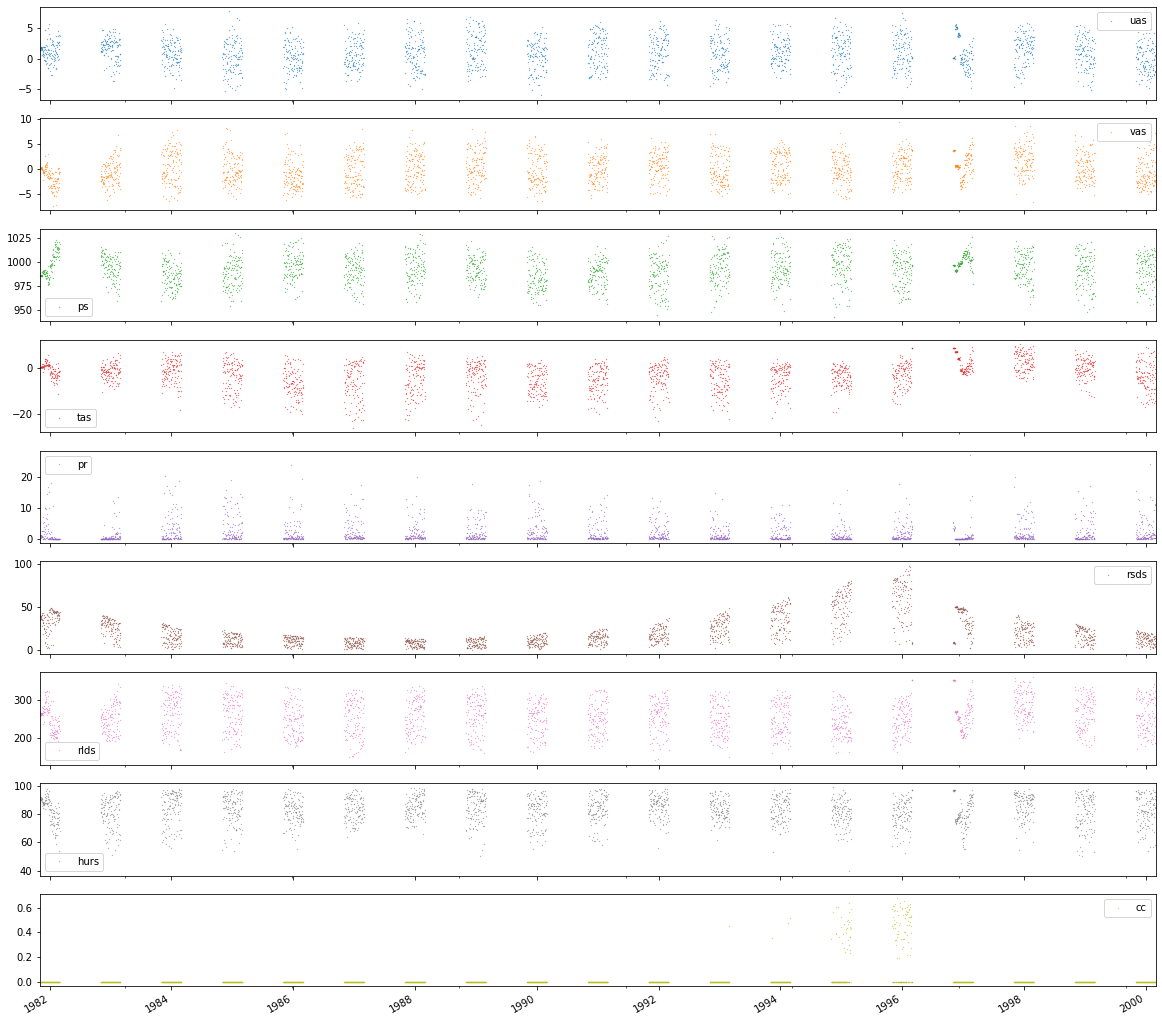

In [11]:
readRDS = robjects.r['readRDS']
df = readRDS('era_system4_winter.rds')
df = pandas2ri.ri2py(df)

dates = df[0][3][1]
dates = ','.join(dates).split(',')
# display(dates)
dates  = [datetime.datetime.strptime(date, '%Y-%m-%d GMT').date() for date in dates]
display(len(dates))
winter = pd.DataFrame(index=dates)
for i in df:
    name = str(i[0][0]).strip()
    values = [float(i) for i in i[1]]
    display(name,len(values))
    winter[name] = values[:len(dates)]

winter.rename(columns=lambda x: re.sub('^\[1\] ','',x),inplace=True)    
winter.rename(columns=lambda x: re.sub('"','',x),inplace=True)     
    
winter.plot(subplots=True,figsize=(20,20),marker='.',linestyle='None',markersize=0.5)
plt.savefig('winter.png')
winter.to_csv('winter.csv')

display(winter.mean(axis=0))

# fig = plt.gcf()
# fig.canvas.layout.width = '100%'
# fig.canvas.layout.height = '2000px'

13880

'[1] "uas"'

13880

'[1] "vas"'

13880

'[1] "ps"'

13880

'[1] "tas"'

13880

'[1] "pr"'

13880

'[1] "rsds"'

13880

'[1] "rlds"'

13880

'[1] "hurs"'

13880

'[1] "cc"'

13880

uas        0.571216
vas        0.553668
ps      1002.653564
tas        6.707133
pr         2.655792
rsds     116.237980
rlds     288.788075
hurs      76.151581
cc         0.420903
dtype: float64

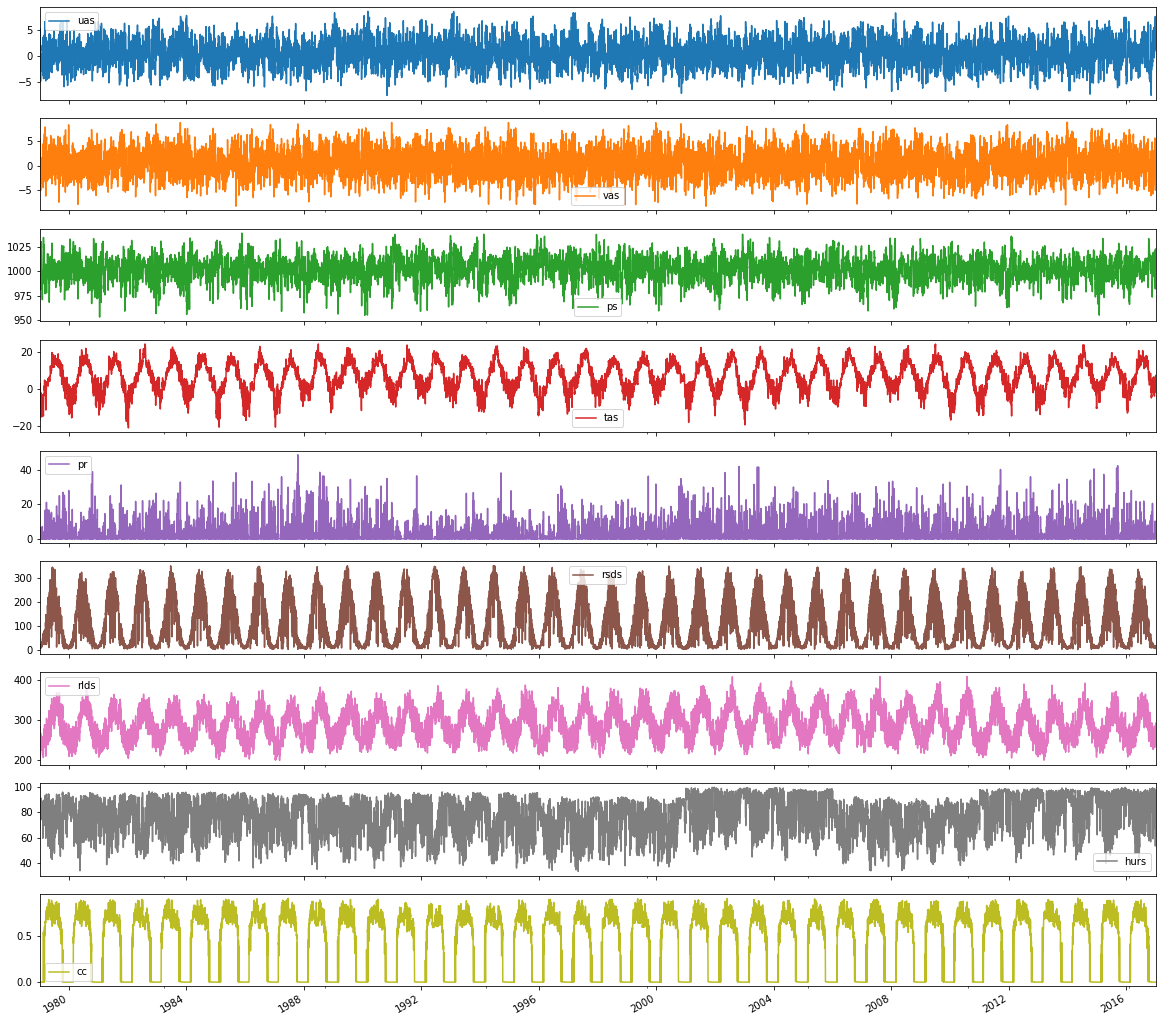

In [2]:
readRDS = robjects.r['readRDS']
df = readRDS('erainterim_bias_bc_cross.rds')
df = pandas2ri.ri2py(df)

dates = df[0][3][1]
dates = ','.join(dates).split(',')
dates  = [datetime.datetime.strptime(date, '%Y-%m-%d GMT').date() for date in dates]
display(len(dates))
era = pd.DataFrame(index=dates)
for i in df:
    name = str(i[0][0]).strip()
    values = [float(i) for i in i[1]]
    display(name,len(values))
    era[name] = values[:len(dates)]

era.rename(columns=lambda x: re.sub('^\[1\] ','',x),inplace=True)    
era.rename(columns=lambda x: re.sub('"','',x),inplace=True)     
    
era.plot(subplots=True,figsize=(20,20))
plt.savefig('eraInterim.png')
era.to_csv('eraInterim_bias_corrected with ewembi.csv')

display(era.mean(axis=0))

# fig = plt.gcf()
# fig.canvas.layout.width = '100%'
# fig.canvas.layout.height = '2000px'

In [ ]:
readRDS = robjects.r['readRDS']
df = readRDS('ewembi.rds')
df = pandas2ri.ri2py(df)
dates = df[0][3][1]
dates = ','.join(dates).split(',')
dates  = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S GMT').date() for date in dates]
ewembi = pd.DataFrame(index=dates)
ewembi.index = pd.to_datetime(ewembi.index)
for i in df:
    name = str(i[0][0]).strip()
    display(name)
    values = [float(i) for i in i[1]]
    ewembi[name] = values

ewembi.rename(columns=lambda x: re.sub('^\[1\] ','',x),inplace=True)    
ewembi.rename(columns=lambda x: re.sub('"','',x),inplace=True)  


ewembi.plot(subplots=True,figsize=(20,5))
plt.savefig('ewembi.png')
ewembi.to_csv('ewembi.csv')

# fig = plt.gcf()
# fig.canvas.layout.width = '100%'
# fig.canvas.layout.height = '2000px'

## Loading observed data
Precipitation and temperature from the nordic gridded dataset.
Station data queried using the frost.met.no api (station data).


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d31db2828>,
      dtype=object)

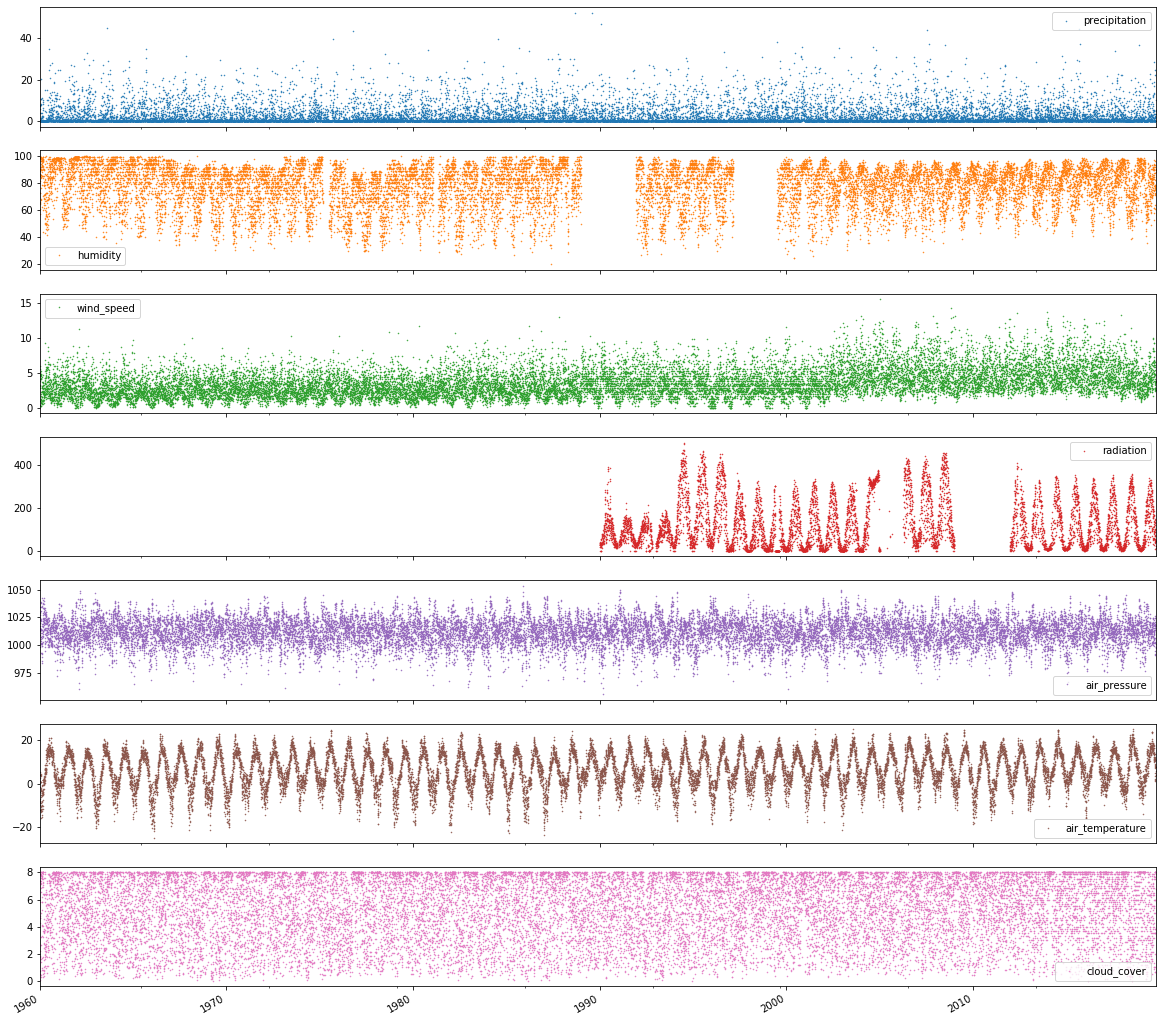

In [88]:
import pickle
#Gridded dataset
metno_gridded_temperature =  pd.read_csv('Vansjø_temperature.csv',index_col=0)
metno_gridded_precip = pd.read_csv('Vansjø_rain.csv',index_col=0)
metno_gridded_temperature.index = pd.to_datetime(metno_gridded_temperature.index)
metno_gridded_precip.index = pd.to_datetime(metno_gridded_precip.index)
metno_gridded_temperature.index = [datetime.datetime(i.year,i.month,i.day) for i in metno_gridded_temperature.index]
metno_gridded_precip.index = [datetime.datetime(i.year,i.month,i.day) for i in metno_gridded_precip.index]

#Observed station data
metno_station_data = pd.read_pickle('metno.pickle')
metno_station_data[1]['radiation'] = metno_station_data[1]['radiation'].resample('d').apply(lambda x : np.nanmean([max(0,i) for i in x]) if sum(np.isnan(x)) < 3 else np.nan )
#Averaging station data
cnd = True
for key,df in metno_station_data[1].items():
    #display(type(df.mean(axis=1).to_frame()))
    if cnd:
        average_station_data = df.mean(axis = 1).to_frame()
        average_station_data.index = [datetime.datetime(i.year,i.month,i.day) for i in average_station_data.index]
        average_station_data.columns = {key}
        cnd = False
    else:
        appendix = df.mean(axis=1).to_frame()
        appendix.columns = {key}
        appendix.index = [datetime.datetime(i.year,i.month,i.day) for i in appendix.index]
        average_station_data = pd.merge(average_station_data,appendix,how='outer',left_index=True,right_index=True)
        
average_station_data.plot(subplots=True,linestyle='None',marker='.',markersize=1,figsize=(20,20))        
# fig = plt.gcf()
# fig.canvas.layout.width = '100%'
# fig.canvas.layout.height = '2000px'

In [103]:
era5_temperature =  pd.read_csv('Vansjø_temperature_era5.csv',index_col=0)
era5_precip = pd.read_csv('Vansjø_rain_era5.csv',index_col=0)
era5_temperature.index = pd.to_datetime(era5_temperature.index)
era5_precip.index = pd.to_datetime(era5_precip.index)
era5_temperature.index = [datetime.datetime(i.year,i.month,i.day) for i in era5_temperature.index]
era5_precip.index = [datetime.datetime(i.year,i.month,i.day) for i in era5_precip.index]

ewembi         2.734974
era-interim    2.655792
observed       2.331442
gridded        2.417551
era5           3.579223
dtype: float64

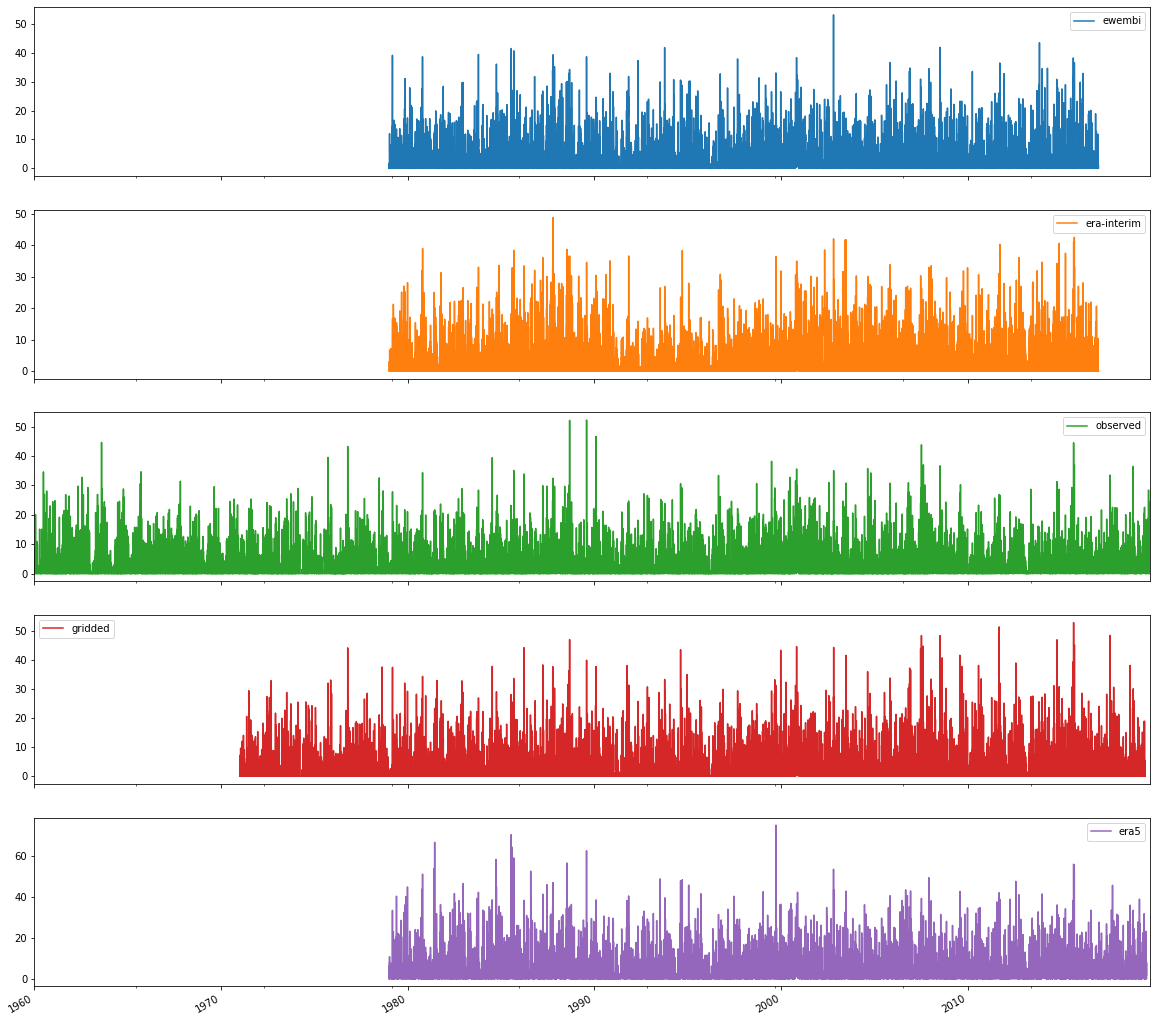

In [104]:
#Comparing precipition
precip = pd.merge(ewembi.pr,era.pr,how='outer',left_index=True,right_index=True)
precip.columns = {'ewembi','era-interim'}
precip = pd.merge(precip,average_station_data['precipitation'],how='outer',left_index=True,right_index=True)
precip = pd.merge(precip,metno_gridded_precip,how='outer',left_index=True,right_index=True)
precip = pd.merge(precip,era5_precip,how='outer',left_index=True,right_index=True)

precip.rename(columns = {'precipitation' : 'observed', 'RR' : 'gridded', 'tp' : 'era5'},inplace=True)

precip.plot(subplots=True,figsize=(20,20))
display(precip.mean())
# fig = plt.gcf()
# fig.canvas.layout.width = '100%'
# fig.canvas.layout.height = '2000px'

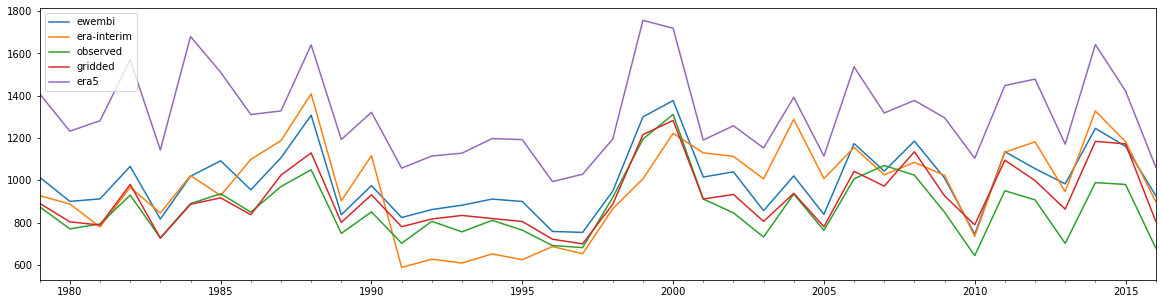

In [105]:
precip.dropna().resample('Y').sum().plot(figsize = (20,5))
fig = plt.gcf()
fig.savefig('precip.png')

ewembi         6.708369
era-interim    6.707133
observed       6.211573
gridded        6.816603
era5           8.325584
dtype: float64

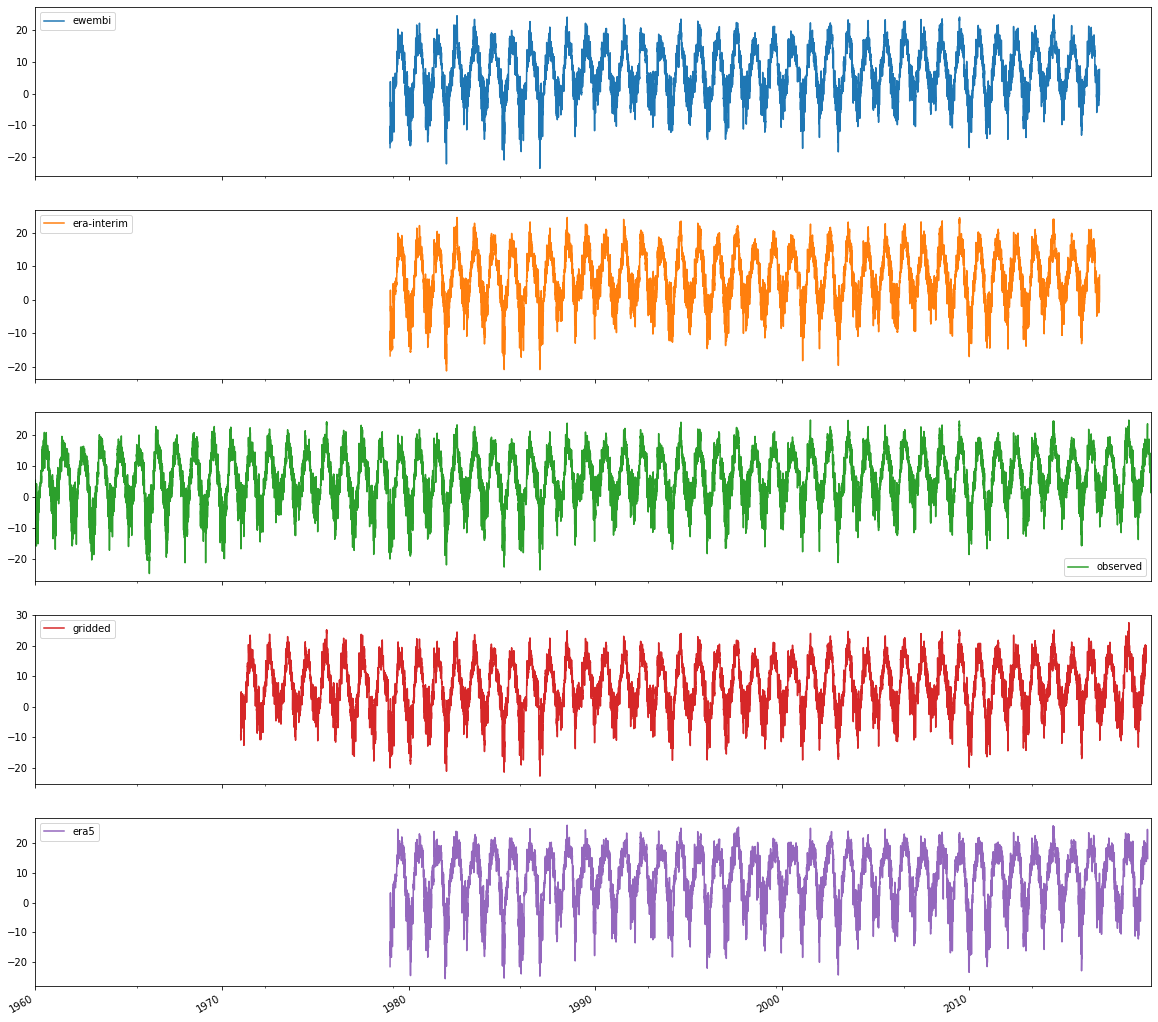

In [106]:
temperature = {}
temperature = pd.merge(ewembi.tas,era.tas,how='outer',left_index=True,right_index=True)
temperature.columns = {'ewembi','era-interim'}
temperature = pd.merge(temperature,average_station_data['air_temperature'],how='outer',left_index=True,right_index=True)
temperature = pd.merge(temperature,metno_gridded_temperature,how='outer',left_index=True,right_index=True)
temperature = pd.merge(temperature,era5_temperature,how='outer',left_index=True,right_index=True)

temperature.rename(columns = {'air_temperature' : 'observed', 'TG' : 'gridded', 't2m' : 'era5'},inplace=True)

temperature.plot(subplots=True,figsize=(20,20))
display(temperature.mean())

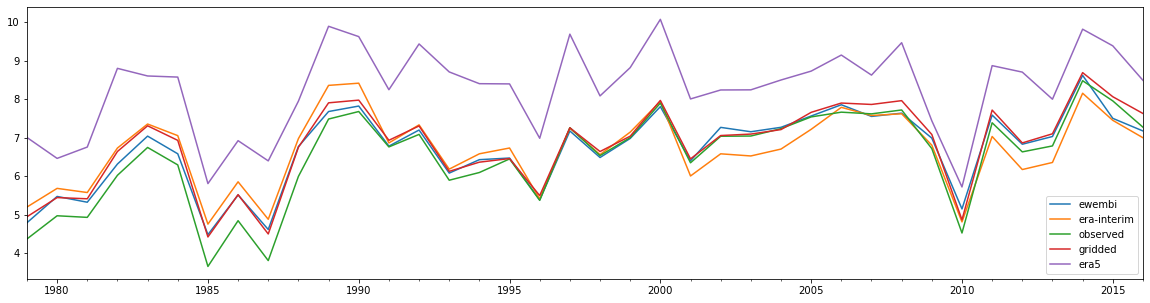

In [107]:
temperature.dropna().resample('Y').mean().plot(figsize = (20,5))
fig = plt.gcf()
fig.savefig('temp.png')

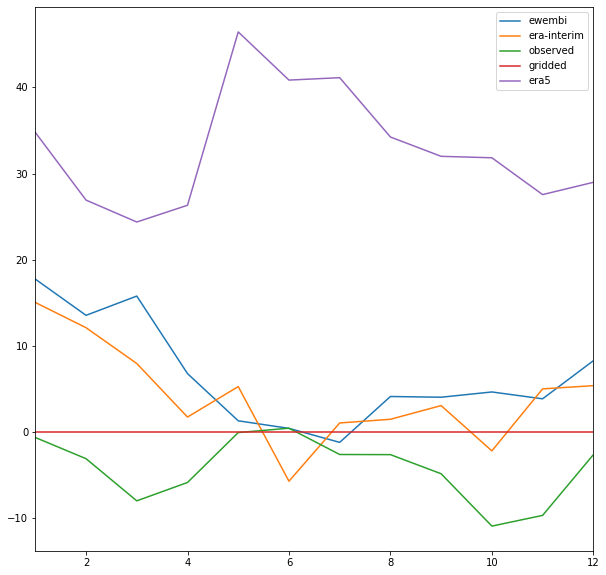

In [108]:
p = precip.dropna()
p = p.resample('m').sum()
p = p.groupby(lambda x : x.month).mean()
p = p.subtract(p.gridded,axis='index')
p.plot(figsize=(10,10))

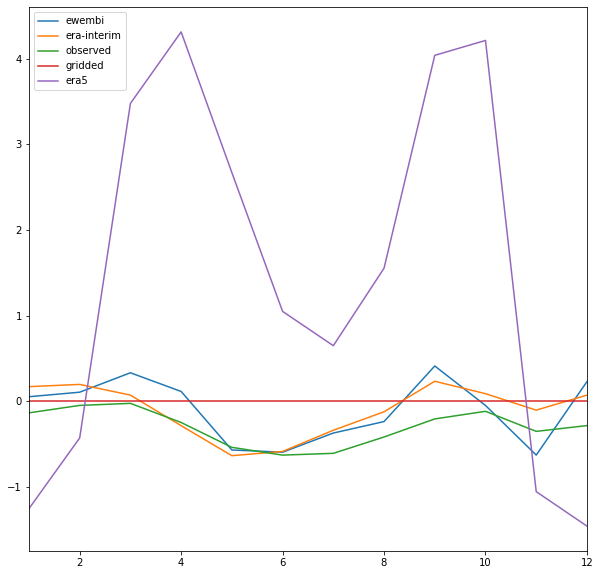

In [109]:
t = temperature.dropna()
t = t.resample('m').mean()
t = t.groupby(lambda x : x.month).mean()
t = t.subtract(t.gridded,axis='index')
t.plot(figsize=(10,10))

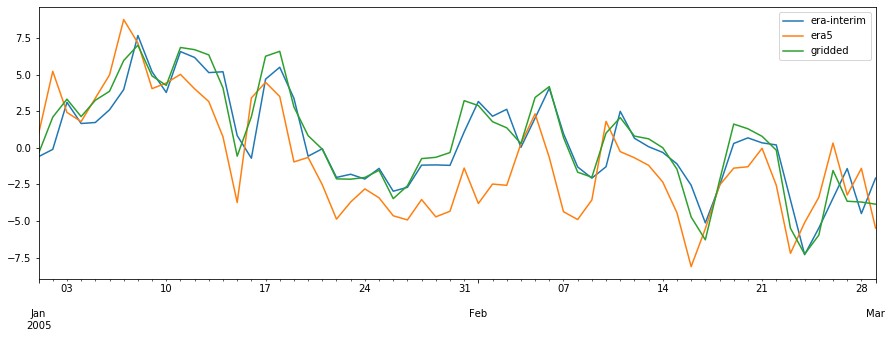

In [110]:
temperature.loc[datetime.datetime(2005,1,1):datetime.datetime(2005,3,1),['era-interim','era5','gridded']].plot(figsize=(15,5))

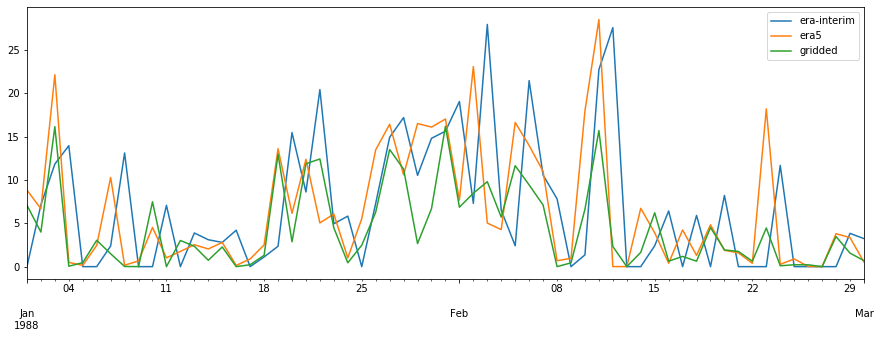

In [113]:
precip.loc[datetime.datetime(1988,1,1):datetime.datetime(1988,3,1),['era-interim','era5','gridded']].plot(figsize=(15,5))

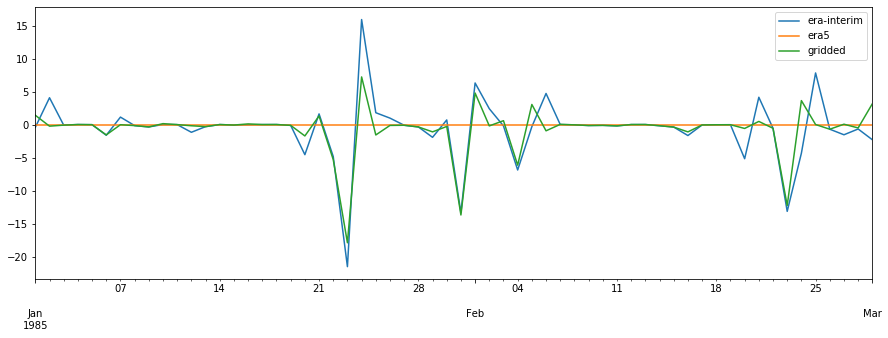

In [112]:
subset = precip.loc[datetime.datetime(1985,1,1):datetime.datetime(1985,3,1),['era-interim','era5','gridded']]
subset.subtract(subset.era5,axis='index').plot(figsize=(15,5))